<font color='lightblue' size=6>Practice 1: Second part. Implementation and evaluation with value iteration rule</font>

<font color='red'> Modify this text section and put your name in *bold*
</font>
---

Recall from theory slides the scenario with no determinism transitions.

In [8]:
import numpy as np
state = [0,1,2,3,4]
action = [0,1,2] # left, staying, right movements
action_name = {
    0: "left",
    1: "stay",
    2: "right"
}
T = np.array([[[1/2,1/2,0,0,0],[1/2,1/2,0,0,0],[2/3,1/3,0,0,0]],
              [[1/3,2/3,0,0,0],[1/4,1/2,1/4,0,0],[0,2/3,1/3,0,0]],
              [[0,1/3,2/3,0,0],[0,1/4,1/2,1/4,0],[0,0,2/3,1/3,0]],
              [[0,0,1/3,2/3,0],[0,0,1/4,1/2,1/4],[0,0,0,2/3,1/3]],
              [[0,0,0,1/3,2/3],[0,0,0,1/2,1/2],[0,0,0,1/2,1/2]]])
num_states = 5
num_actions = 3
gamma = 1/2
R = np.zeros(5)
R[4] = 1

<font color='brown' size=6> *Exercise* </font>

Write a function implementing the value iteration algorithm. The function must return the V\* array containing the optimal value for each state. With the above proposed values, the result should be:

[0.00833333 0.025      0.1        0.4        1.6       ]

In [55]:
def ValueIteration(T, num_states, num_actions, gamma, R):
    vlast = np.array([0 for i in range(num_states)])
    vcurr = np.zeros_like(vlast)
    iterations = 0
    difference = 1000.0
    while 1:
        # for each state
        for state in range(num_states):
            # for each action:
            actions = np.zeros(num_actions)
            for action in range(num_actions):
                action_val = T[state][action] * (R + gamma*vlast)
                action_val = np.sum(action_val)
                print(f"For action {action_name[action]}; Vcurr({state}) = {T[state][action]} * ({R} + {gamma}*{vlast}) = {action_val}")
                actions[action] = action_val
                # print(f"Actions (l, s, r) = {actions}")
            selected = np.max(actions)
            print(f"actions = {actions} -> max = {selected}")
            vcurr[state] = selected #-> no se pone en su sitio la mierda
            
        nabs = np.absolute(vcurr-vlast)
        difference = np.max(np.append(nabs, difference))
        
        if difference < 0.02: break
        
        vlast = vcurr
        
        iterations += 1
        
        print(f"THIS ITERATION GAVE {vlast}")
        if iterations > 3: break

    return vlast, iterations

V = ValueIteration(T, num_states, num_actions, gamma, R)

# print(f"V = {V[0]} (necessary iterations = {V[1]})")

For action left; Vcurr(0) = [0.5 0.5 0.  0.  0. ] * ([0. 0. 0. 0. 1.] + 0.5*[0 0 0 0 0]) = 0.0
For action stay; Vcurr(0) = [0.5 0.5 0.  0.  0. ] * ([0. 0. 0. 0. 1.] + 0.5*[0 0 0 0 0]) = 0.0
For action right; Vcurr(0) = [0.66666667 0.33333333 0.         0.         0.        ] * ([0. 0. 0. 0. 1.] + 0.5*[0 0 0 0 0]) = 0.0
actions = [0. 0. 0.] -> max = 0.0
For action left; Vcurr(1) = [0.33333333 0.66666667 0.         0.         0.        ] * ([0. 0. 0. 0. 1.] + 0.5*[0 0 0 0 0]) = 0.0
For action stay; Vcurr(1) = [0.25 0.5  0.25 0.   0.  ] * ([0. 0. 0. 0. 1.] + 0.5*[0 0 0 0 0]) = 0.0
For action right; Vcurr(1) = [0.         0.66666667 0.33333333 0.         0.        ] * ([0. 0. 0. 0. 1.] + 0.5*[0 0 0 0 0]) = 0.0
actions = [0. 0. 0.] -> max = 0.0
For action left; Vcurr(2) = [0.         0.33333333 0.66666667 0.         0.        ] * ([0. 0. 0. 0. 1.] + 0.5*[0 0 0 0 0]) = 0.0
For action stay; Vcurr(2) = [0.   0.25 0.5  0.25 0.  ] * ([0. 0. 0. 0. 1.] + 0.5*[0 0 0 0 0]) = 0.0
For action right; Vc

<font color='brown' size=6> *Exercise* </font>

Lets calculate now what is the optimum policy given this optimum values for the states.

First, write a function to calculate Q\*(s,a) from V\* for all state s and all action a. This function must return a (num_state, num_action) bidimensional array.

For this scenario. given V\* calculated with gamma = 0.5 the result should be:

[[0.00833333 0.00833333 0.00694444]

 [0.00972222 0.01979166 0.025     ]

 [0.0375     0.078125   0.1       ]

 [0.15       0.3125     0.4       ]

 [1.6        1.5        1.5       ]]


In [ ]:
def QValueFromV(T, num_states, num_actions, gamma, R, V):






Q = QValueFromV(T, num_states, num_actions, gamma, R, V)
print(Q)


<font color='brown' size=6> *Exercise* </font>

Now, calculate the optimum policy from Q*(s,a). Write a function for doing that. For the already proposed values the result should be:

[0. 2. 2. 2. 0.]

In [ ]:
def OptimalPolicy(num_states,Q):





print(OptimalPolicy(num_states, Q))

<font color='brown' size=6> *Exercise* </font>

Let's do a graphical study about how the value of V\* changes as gamma changes too. First, import mapplotlib as you already did in the first part of this practice.
Remember to import matplotlib and put the size of the image as 7,4.

In [ ]:
import


Then, calculate and store V\* for the gamma values:

gamma = (0.1, 0.25, 0.5, 0,75, 0.9, 1)

Next, write matplotlib python code to show **this** plot (each line corresponds with the values of each state, from state 0 to state 4, in each of the gamma values proposed):

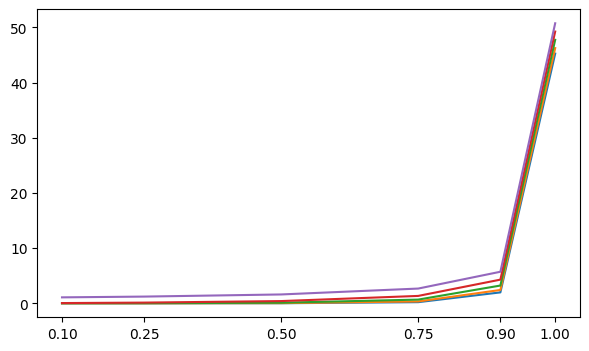

Explain in the next text cell what do you observe from this plot for this scenario

Write here your thoughts